<a href="https://colab.research.google.com/github/aswinjayan94/EIP/blob/master/Assignment_3_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, SeparableConv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


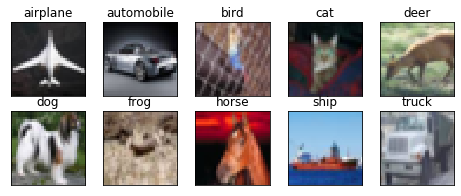

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # 32
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3)) # 30
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same')) # 15
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3)) # 13
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) # 6
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3)) # 4
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 29s 75ms/step - loss: 1.8360 - acc: 0.3005 - val_loss: 1.4084 - val_acc: 0.4817
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3295 - acc: 0.5201 - val_loss: 1.1353 - val_acc: 0.5964
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1051 - acc: 0.6104 - val_loss: 0.9968 - val_acc: 0.6435
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9603 - acc: 0.6656 - val_loss: 0.8538 - val_acc: 0.7003
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8553 - acc: 0.7038 - val_loss: 0.8293 - val_acc: 0.7174
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8023 - acc: 0.7254 - val_loss: 0.7200 - val_acc: 0.7506
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7356 - acc: 0.7467 - val_loss: 0.7153 - val_acc: 0.7560
Epoch 8/50
390/390 [==============================] - 

In [0]:
# Define the model
model7 = Sequential()

# 3x3 depthwise separable conv2d with same padding========================================================================
model7.add(SeparableConv2D(filters = 128, kernel_size=3, padding= 'same', activation = 'relu', input_shape = (32, 32, 3)))
# output of above layer - 32x32x128, receptive field: 3x3
model7.add(BatchNormalization())
# ------------------------------------------------------------------------------------------------------------------------

# 3x3 depthwise separable conv2d with dropout=============================================================================
model7.add(SeparableConv2D(filters = 128, kernel_size=3, activation = 'relu'))
# output of above layer - 30x30x128, receptive field: 5x5
model7.add(BatchNormalization())
model7.add(Dropout(0.2))
# ------------------------------------------------------------------------------------------------------------------------

# 3x3 depthwise separable conv2d with dropout=============================================================================
model7.add(SeparableConv2D(filters = 128, kernel_size=3, activation = 'relu'))
# output of above layer - 28x28x128, receptive field: 7x7
model7.add(BatchNormalization())
model7.add(Dropout(0.2))
# ------------------------------------------------------------------------------------------------------------------------

# max-pool================================================================================================================
model7.add(MaxPooling2D(pool_size=(2, 2)))
# output of above layer - 14x14x128, receptive field: 14x14
# ------------------------------------------------------------------------------------------------------------------------

# 3x3 depthwise separable conv2d with same padding and dropout============================================================
model7.add(SeparableConv2D(filters = 80, kernel_size=3, padding = 'same', activation = 'relu'))
# output of above layer - 14x14x80, receptive field: 16x16
model7.add(BatchNormalization())
model7.add(Dropout(0.2))
# ------------------------------------------------------------------------------------------------------------------------

# 3x3 depthwise separable conv2d with dropout=============================================================================
model7.add(SeparableConv2D(filters = 96, kernel_size=3, activation = 'relu'))
# output of above layer - 12x12x96, receptive field: 18x18
model7.add(BatchNormalization())
model7.add(Dropout(0.2))
# ------------------------------------------------------------------------------------------------------------------------

# 3x3 depthwise separable conv2d with dropout=============================================================================
model7.add(SeparableConv2D(filters = 128, kernel_size=3, activation = 'relu'))
# output of above layer - 10x10x128, receptive field: 20x20
model7.add(BatchNormalization())
model7.add(Dropout(0.3))
# ------------------------------------------------------------------------------------------------------------------------

# max-pool================================================================================================================
model7.add(MaxPooling2D(pool_size=(2, 2)))
# output of above layer - 5x5x128, receptive field: 32x32 (40x40 theoretically)
# ------------------------------------------------------------------------------------------------------------------------

# 3x3 depthwise separable conv2d with dropout=============================================================================
model7.add(SeparableConv2D(filters = 160, kernel_size=3, activation = 'relu'))
# output of above layer - 3x3x160, receptive field: 32x32 (42x42 theoretically)
model7.add(Dropout(0.3))
# ------------------------------------------------------------------------------------------------------------------------

# 3x3 conv2D with softmax activation======================================================================================
model7.add(SeparableConv2D(filters = num_classes, kernel_size=3, activation = 'softmax'))
# output of above layer - 1x1xnum_classes(10), receptive field: 32x32 (44x44 theoretically)
# ------------------------------------------------------------------------------------------------------------------------

# flatten=================================================================================================================
model7.add(Flatten())
# ------------------------------------------------------------------------------------------------------------------------

# Compile the model
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model7.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_49 (Separab (None, 32, 32, 128)       539       
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
separable_conv2d_50 (Separab (None, 30, 30, 128)       17664     
_________________________________________________________________
batch_normalization_38 (Batc (None, 30, 30, 128)       512       
_________________________________________________________________
dropout_37 (Dropout)         (None, 30, 30, 128)       0         
_________________________________________________________________
separable_conv2d_51 (Separab (None, 28, 28, 128)       17664     
_________________________________________________________________
batch_normalization_39 (Batc (None, 28, 28, 128)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 47s 120ms/step - loss: 1.4698 - acc: 0.4576 - val_loss: 1.1835 - val_acc: 0.5827
Epoch 2/50
390/390 [==============================] - 41s 104ms/step - loss: 0.9883 - acc: 0.6485 - val_loss: 0.9754 - val_acc: 0.6625
Epoch 3/50
390/390 [==============================] - 41s 104ms/step - loss: 0.8345 - acc: 0.7051 - val_loss: 0.8313 - val_acc: 0.7094
Epoch 4/50
390/390 [==============================] - 41s 105ms/step - loss: 0.7404 - acc: 0.7399 - val_loss: 0.7503 - val_acc: 0.7431
Epoch 5/50
390/390 [==============================] - 41s 104ms/step - loss: 0.6759 - acc: 0.7630 - val_loss: 0.7719 - val_acc: 0.7356
Epoch 6/50
390/390 [==============================] - 40s 102ms/step - loss: 0.6291 - acc: 0.7765 - val_loss: 0.6960 - val_acc: 0.7608
Epoch 7/50
390/390 [==============================] - 41s 104ms/step - loss: 0.5975 - acc: 0.7887 - val_loss: 0.6714 - val_acc: 0.7735
Epoch 8/50
390/390 [==============================] - 4

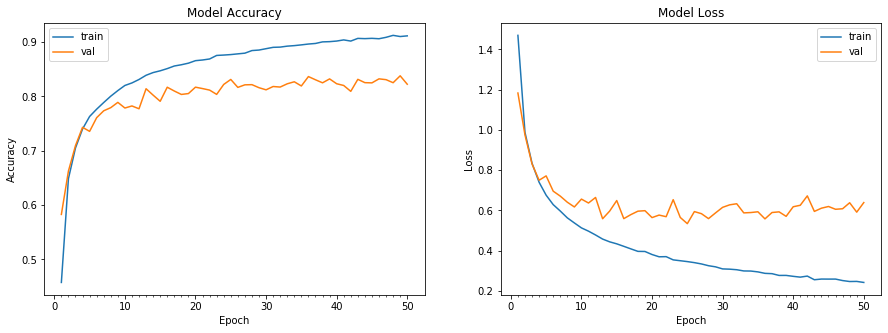

Accuracy on test data is: 82.24


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model7_info = model7.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model7_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model7))